# Load Tfrecord

In [ ]:
import tensorflow as tf

In [ ]:
feature_description = {
    'image': tf.io.FixedLenFeature([], tf.string, default_value=''),
    'image_name': tf.io.FixedLenFeature([], tf.string, default_value=''),
    'species_name': tf.io.FixedLenFeature([], tf.string, default_value=''),
    'individual_id': tf.io.FixedLenFeature([], tf.string, default_value=''),
    'family_name': tf.io.FixedLenFeature([], tf.string, default_value=''),
}

def _parse_function(example_proto):
    # .parse_example if batched
    parsed_ex = tf.io.parse_single_example(example_proto, feature_description)
    parsed_ex['image'] = tf.io.parse_tensor(parsed_ex['image'], tf.uint8)
    return parsed_ex

In [ ]:
fname = ['/content/drive/MyDrive/Colab Notebooks/Tensorflow Practice 2022/Kaggle/Happywhale/happywhale.tfrecord']
raw_ds = tf.data.TFRecordDataset(fname)
raw_ds

<TFRecordDatasetV2 element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [ ]:
parsed_ds = raw_ds.map(_parse_function)

In [ ]:
next(iter(parsed_ds)).keys()

dict_keys(['family_name', 'image', 'image_name', 'individual_id', 'species_name'])

# Arcface:
* https://www.kaggle.com/aikhmelnytskyy/happywhale-arcface-baseline-eff7-tpu-768-inference
* https://www.kaggle.com/dragonzhang/happywhale-effnet-b7-fork-with-nobg-whales

In [1]:
import os
IS_COLAB = not os.path.exists('/kaggle/input')
print(IS_COLAB)

True


In [2]:
import tensorflow as tf
try:
    # TPU Detection
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
else:
    # Default distrib. for CPU/GPU
    strategy = tf.distribute.get_strategy()

AUTO = tf.data.experimental.AUTOTUNE
print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.117.162.106:8470
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.117.162.106:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.117.162.106:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


REPLICAS:  8


In [3]:
if IS_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
else:
    from kaggle_datasets import KaggleDatasets

Mounted at /content/drive


In [4]:
!pip install -q efficientnet
!pip install tensorflow_addons
import re
import os
import numpy as np
import pandas as pd
import random
import math
import tensorflow as tf
import efficientnet.tfkeras as efn
from sklearn import metrics
from sklearn.model_selection import KFold, train_test_split
from tensorflow.keras import backend as K
import tensorflow_addons as tfa
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import pickle
import json
import tensorflow_hub as tfhub
from datetime import datetime

     |████████████████████████████████| 50 kB 3.1 MB/s 
     |████████████████████████████████| 1.1 MB 5.2 MB/s 


## Config

In [5]:
save_dir = '.'
EXPERIMENT = 1
run_ts = datetime.now().strftime('%Y%m%d-%H%M%S')
print(run_ts)
if IS_COLAB:
    save_dir = f'/content/drive/MyDrive/Colab\ Notebooks/Tensorflow\ Practice\ 2022/Kaggle/Happywhale/experiments-{EXPERIMENT}/{run_ts}'
    !mkdir -p {save_dir}

20220318-200807


In [6]:
class config:
    SEED = 42
    FOLD_TO_RUN = EXPERIMENT
    FOLDS = 5
    DEBUG = False
    EVALUATE = True
    RESUME = False
    RESUME_EPOCH = None

    ### Dataset
    BATCH_SIZE = 16 * strategy.num_replicas_in_sync
    #BATCH_SIZE = 32 * strategy.num_replicas_in_sync
    IMAGE_SIZE = 512
    N_CLASSES = 15587

    ### Model
    model_type = 'effnetv1'
    EFF_NET = 7
    #EFF_NET = 5
    EFF_NETV2 = 's-21k-ft1k'
    FREEZE_BATCH_NORM = False
    head = 'arcface'
    EPOCHS = 50
    #EPOCHS = 20
    LR = 0.001
    message = 'baseline'

    ### Augments
    CUTOUT = False

    ### Save-dir
    save_dir = save_dir.replace('\\', '')

    ### Inference
    KNN = 100
    #KNN = 1000

def count_data_items(filenames):
    n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1))
         for filename in filenames]
    return np.sum(n)

# Function to seed everything
def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    tf.random.set_seed(seed)

def is_interactive():
    return 'runtime' in get_ipython().config.IPKernelApp.connection_file

IS_INTERACTIVE = is_interactive()
print(IS_INTERACTIVE)

True


In [7]:
MODEL_NAME = None
if config.model_type == 'effnetv1':
    MODEL_NAME = f'effnetv1_b{config.EFF_NET}'
elif config.model_type == 'effnetv2':
    MODEL_NAME = f'effnetv2_{config.EFF_NETV2}'

config.MODEL_NAME = MODEL_NAME
print(MODEL_NAME)

effnetv1_b7


In [8]:
with open(config.save_dir+'/config.json', 'w') as fp:
    json.dump({x:dict(config.__dict__)[x] for x in dict(config.__dict__) if not x.startswith('_')}, fp)

In [9]:
GCS_PATH = 'gs://kds-8011414bcb6846313ebee8d2947999163d9f5936f20a7de1e1f78be4'
if not IS_COLAB:
    #GCS_PATH = KaggleDatasets().get_gcs_path('happywhale-tfrecords-v1')
    GCS_PATH = KaggleDatasets().get_gcs_path('nobgtfrecords')

train_files = np.sort(np.array(tf.io.gfile.glob(GCS_PATH + '/happywhale-2022-train*.tfrec')))
test_files = np.sort(np.array(tf.io.gfile.glob(GCS_PATH + '/happywhale-2022-test*.tfrec')))
print(GCS_PATH)
print(len(train_files), len(test_files), count_data_items(train_files), count_data_items(test_files))

gs://kds-8011414bcb6846313ebee8d2947999163d9f5936f20a7de1e1f78be4
10 10 51033 27956


## Data

In [10]:
def arcface_format(posting_id, image, label_group, matches):
    return posting_id, {'inp1': image, 'inp2': label_group}, label_group, matches

def arcface_inference_format(posting_id, image, label_group, matches):
    return image, posting_id

def arcface_eval_format(posting_id, image, label_group, matches):
    return image, label_group

# Data augment func
def data_augment(posting_id, image, label_group, matches):

    ### CUTOUT
    if tf.random.uniform([]) > 0.5 and config.CUTOUT:
        N_CUTOUT = 6
        for cutouts in range(N_CUTOUT):
            if tf.random.uniform([]) > 0.5:
                DIM = config.IMAGE_SIZE
                CUTOUT_LENGTH = DIM//8
                x1 = tf.cast(tf.random.uniform([], 0, DIM-CUTOUT_LENGTH), tf.int32)
                x2 = tf.cast(tf.random.uniform([], 0, DIM-CUTOUT_LENGTH), tf.int32)
                filter_ = tf.concat([tf.zeros((x1, CUTOUT_LENGTH)), 
                                     tf.ones((CUTOUT_LENGTH, CUTOUT_LENGTH)), 
                                     tf.zeros((DIM-x1-CUTOUT_LENGTH, CUTOUT_LENGTH))], axis=0)
                filter_ = tf.concat([tf.zeros((DIM, x2)),
                                     filter_,
                                     tf.zeros((DIM, DIM-x2-CUTOUT_LENGTH))], 
                                    axis=1)
                cutout = tf.reshape(1-filter_, (DIM, DIM, 1))
                image = cutout*image

    image = tf.image.random_flip_left_right(image)
    #image = tf.image.random_flip_up_down(image)
    image = tf.image.random_hue(image, 0.01)
    image = tf.image.random_saturation(image, 0.70, 1.30)
    image = tf.image.random_contrast(image, 0.80, 1.20)
    image = tf.image.random_brightness(image, 0.10)
    return posting_id, image, label_group, matches

## Function to decode our images
#def decode_image(image_data):
#    image = tf.image.decode_jpeg(image_data, channels=3)
#    image = tf.image.resize(image, [config.IMAGE_SIZE, config.IMAGE_SIZE])
#    image = tf.cast(image, tf.float32) / 255.0
#    return image

# Updated to include crops.
def decode_image(image_data, box):
    if box is not None and box[0] != -1:
        left, top, right, bottom = box[0], box[1], box[2], box[3]
        bbs = tf.convert_to_tensor([top, left, bottom - top, right - left])
        image = tf.io.decode_and_crop_jpeg(image_data, bbs, channels=3)
    else:
        image = tf.image.decode_jpeg(image_data, channels = 3)

    image = tf.image.resize(image, [config.IMAGE_SIZE,config.IMAGE_SIZE])
    image = tf.cast(image, tf.float32) / 255.0
    return image

# Parse images and get tar
def read_labeled_tfrecord(example):
    LABELED_TFREC_FORMAT = {
        "image_name": tf.io.FixedLenFeature([], tf.string),
        "image": tf.io.FixedLenFeature([], tf.string),
        "target": tf.io.FixedLenFeature([], tf.int64),
        #"matches": tf.io.FixedLenFeature([], tf.string)
        #'detic_box': tf.io.FixedLenFeature([4], tf.int64),
        #'yolov5_box': tf.io.FixedLenFeature([4], tf.int64),
    }

    example = tf.io.parse_single_example(example, LABELED_TFREC_FORMAT)
    posting_id = example['image_name']
    image = decode_image(example['image'], box=None)
    #label_group = tf.one_hot(tf.cast(example['label_group'], tf.int32), depth=N_CLASSES)
    label_group = tf.cast(example['target'], tf.int32)
    #matches = example['matches']
    matches = 1
    return posting_id, image, label_group, matches

# Loads TFRecs and parse into tensors
def load_dataset(filenames, ordered=False):
    ignore_order = tf.data.Options()
    if not ordered:
        ignore_order.experimental_deterministic = False

    dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTO)
    #dataset = dataset.cache()
    dataset = dataset.with_options(ignore_order)
    dataset = dataset.map(read_labeled_tfrecord, num_parallel_calls=AUTO)
    return dataset

# Get train tensors
def get_training_dataset(filenames):
    dataset = load_dataset(filenames, ordered=False)
    dataset = dataset.map(data_augment, num_parallel_calls=AUTO)
    dataset = dataset.map(arcface_format, num_parallel_calls=AUTO)
    dataset = dataset.map(lambda posting_id, image, label_group, matches: (image, label_group))
    dataset = dataset.repeat()
    dataset = dataset.shuffle(2048)
    dataset = dataset.batch(config.BATCH_SIZE)
    dataset = dataset.prefetch(AUTO)
    return dataset

# Get validation tenosrs
def get_val_dataset(filenames):
    dataset = load_dataset(filenames, ordered=True)
    dataset = dataset.map(data_augment, num_parallel_calls=AUTO)
    dataset = dataset.map(arcface_format, num_parallel_calls=AUTO)
    dataset = dataset.map(lambda posting_id, image, label_group, matches: (image, label_group))
    dataset = dataset.batch(config.BATCH_SIZE)
    dataset = dataset.prefetch(AUTO)
    return dataset

# Get eval tensors
def get_eval_dataset(filenames, get_targets=True):
    dataset = load_dataset(filenames, ordered=True)
    dataset = dataset.map(data_augment, num_parallel_calls=AUTO)
    dataset = dataset.map(arcface_eval_format, num_parallel_calls=AUTO)
    if not get_targets:
        dataset = dataset.map(lambda image, target: image)
    dataset = dataset.batch(config.BATCH_SIZE)
    dataset = dataset.prefetch(AUTO)
    return dataset

# Get test tensors
def get_test_dataset(filenames, get_names=True):
    dataset = load_dataset(filenames, ordered=True)
    dataset = dataset.map(data_augment, num_parallel_calls=AUTO)
    dataset = dataset.map(arcface_inference_format, num_parallel_calls=AUTO)
    if not get_names:
        dataset = dataset.map(lambda image, posting_id: image)
    dataset = dataset.batch(config.BATCH_SIZE)
    dataset = dataset.prefetch(AUTO)
    return dataset

51033


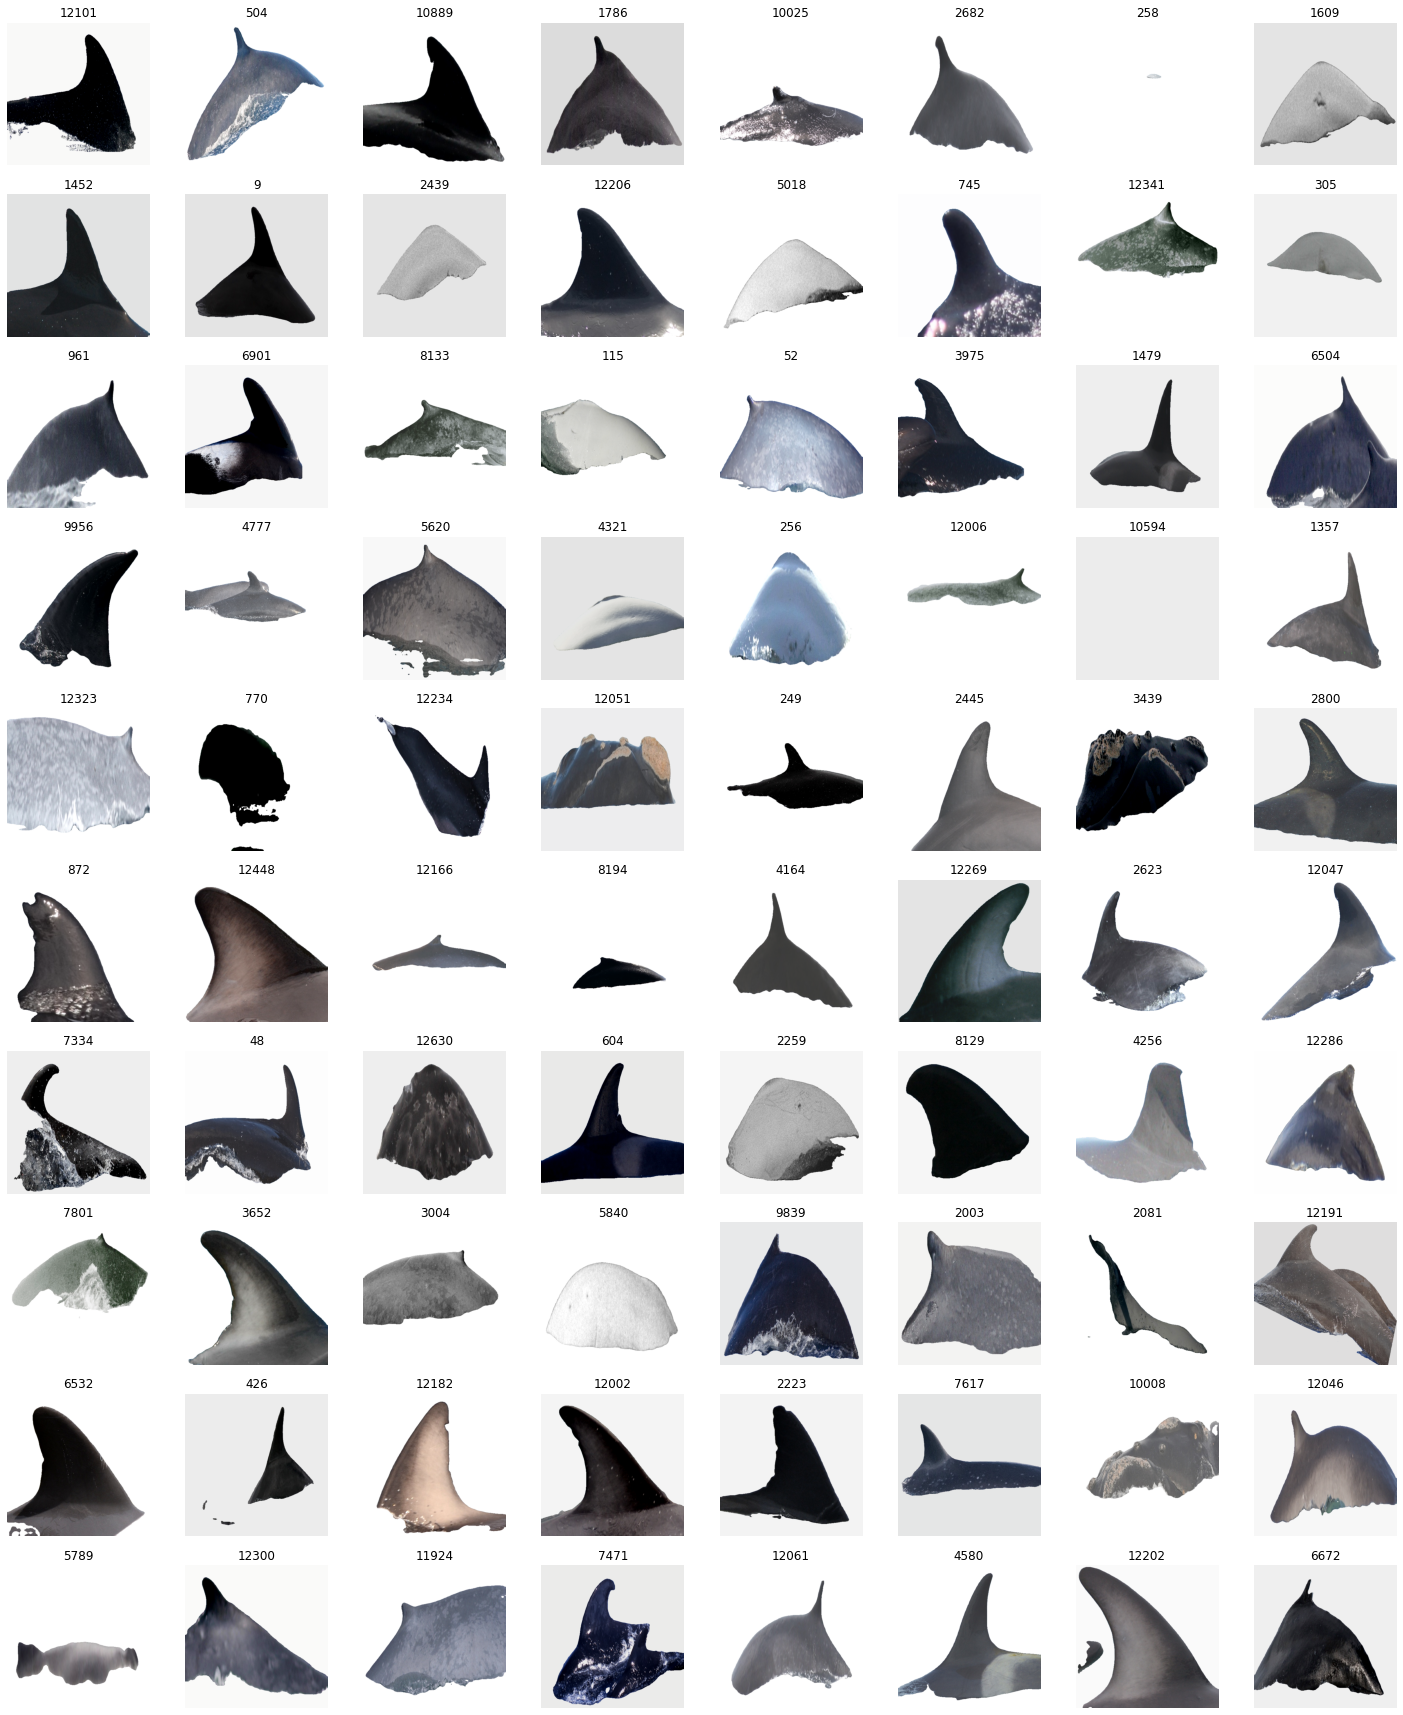

(128, 512, 512, 3)


In [11]:
row = 10; col = 8;
row = min(row, config.BATCH_SIZE//col)
N_TRAIN = count_data_items(train_files)
print(N_TRAIN)
ds = get_training_dataset(train_files)

for (sample,label) in ds:
    img = sample['inp1']
    plt.figure(figsize=(25, int(25*row/col)))
    for j in range(row*col):
        plt.subplot(row,col,j+1)
        plt.title(label[j].numpy())
        plt.axis('off')
        plt.imshow(np.clip(img[j,], 0., 1.))
    plt.show()
    break
print(img.shape)

27956


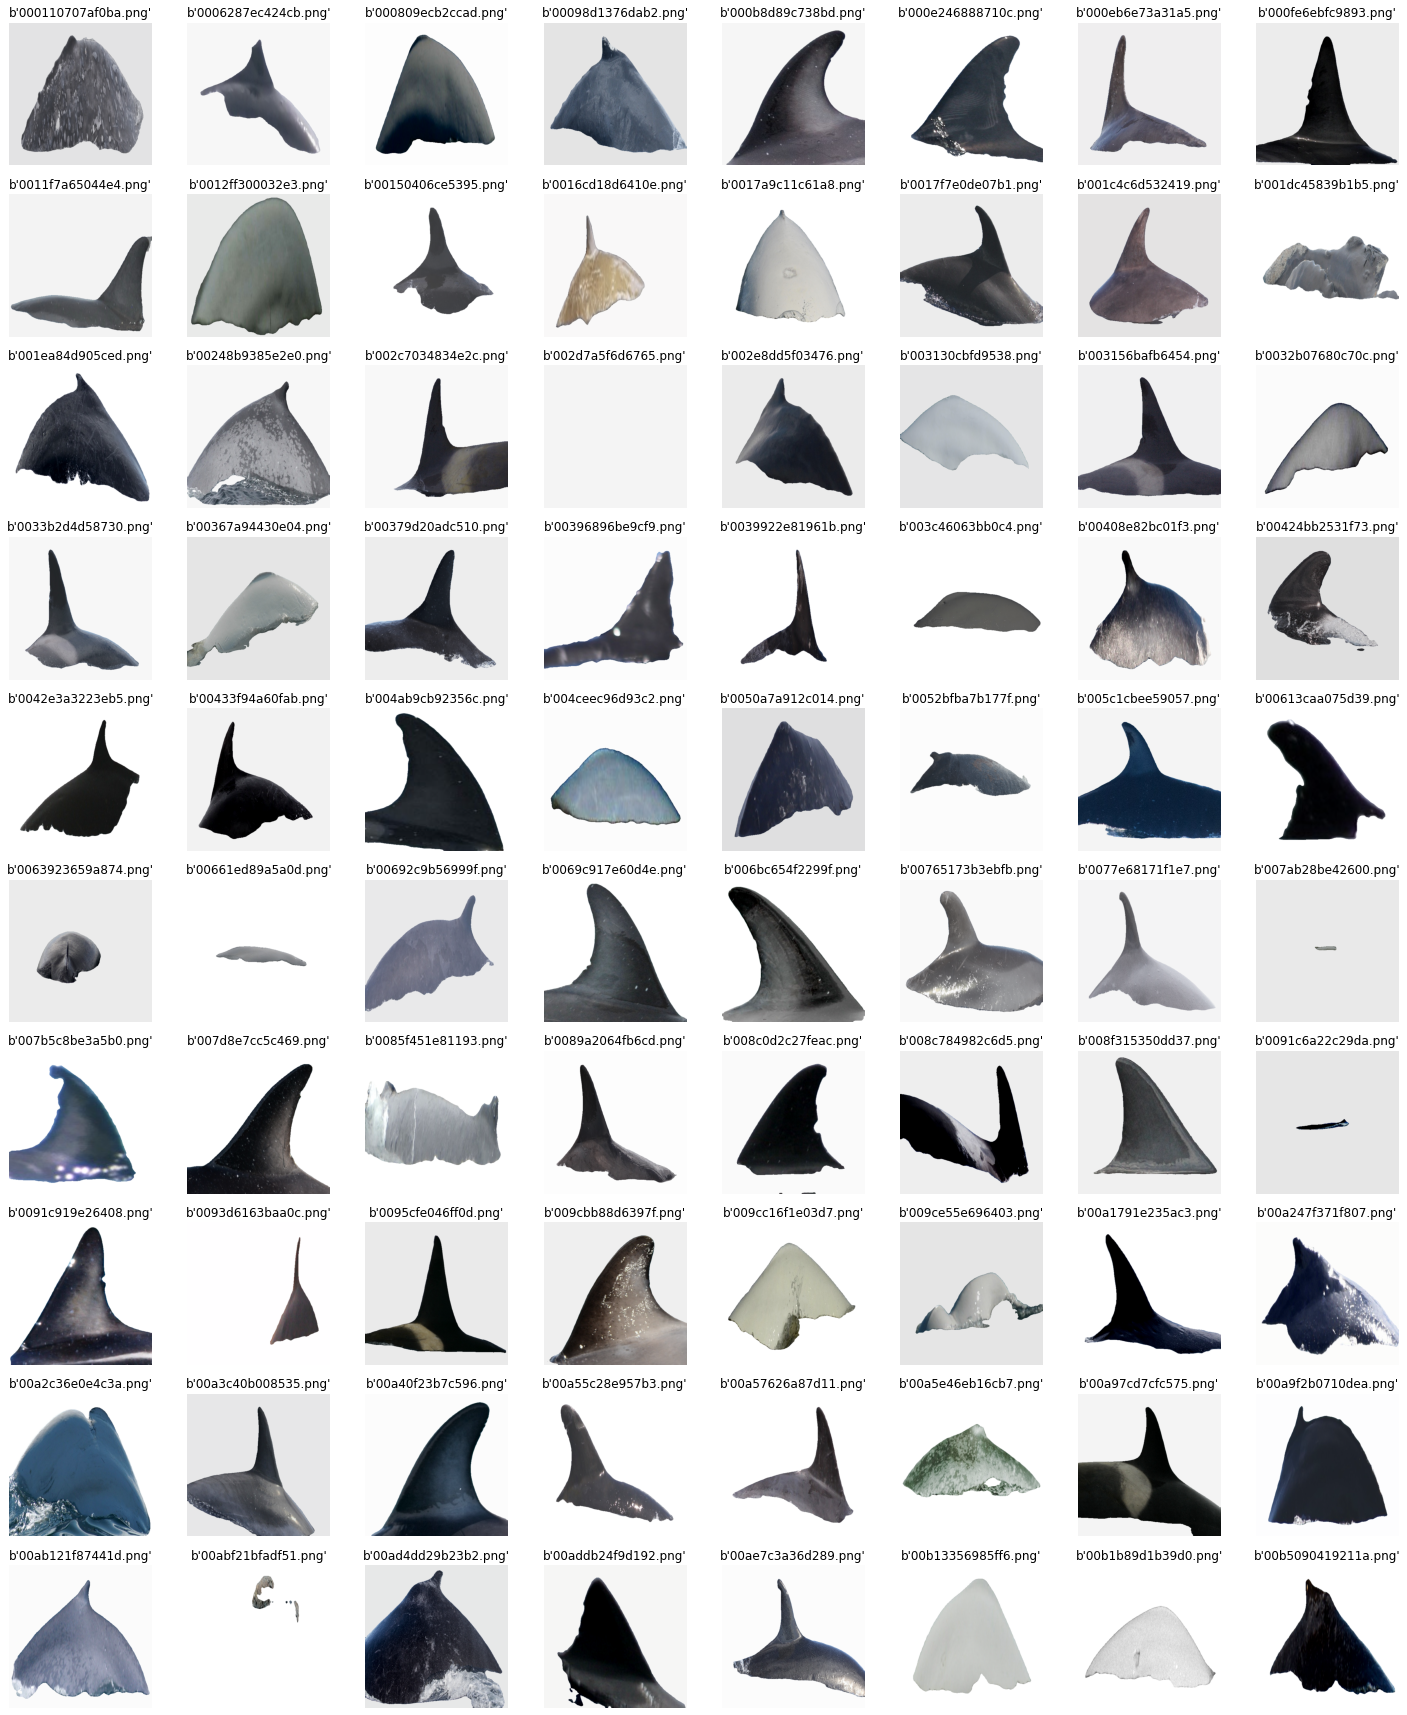

(128, 512, 512, 3)


In [12]:
row = 10; col = 8;
row = min(row, config.BATCH_SIZE//col)
N_TEST = count_data_items(test_files)
print(N_TEST)
ds = get_test_dataset(test_files)

for (img,label) in ds:
    plt.figure(figsize=(25,int(25*row/col)))
    for j in range(row*col):
        plt.subplot(row,col,j+1)
        plt.title(label[j].numpy())
        plt.axis('off')
        plt.imshow(np.clip(img[j,], 0., 1.))
    plt.show()
    break
print(img.shape)

## Model

In [13]:
class ArcMarginProduct(tf.keras.layers.Layer):
    '''
    Implements large margin arc distance.

    Reference:
        https://arxiv.org/pdf/1801.07698.pdf
        https://github.com/lyakaap/Landmark2019-1st-and-3rd-Place-Solution/
            blob/master/src/modeling/metric_learning.py
    '''
    def __init__(self, n_classes, s=30, m=0.50, easy_margin=False, ls_eps=0.0, **kwargs):
        super(ArcMarginProduct, self).__init__(**kwargs)
        self.n_classes = n_classes
        self.s = s
        self.m = m
        self.ls_eps = ls_eps
        self.easy_margin = easy_margin
        self.cos_m = tf.math.cos(m)
        self.sin_m = tf.math.sin(m)
        self.th = tf.math.cos(math.pi - m)
        self.mm = tf.math.sin(math.pi - m) * m

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'n_classes': self.n_classes,
            's': self.s,
            'm': self.m,
            'ls_eps': self.ls_eps,
            'easy_margin': self.easy_margin
        })
        return config

    def build(self, input_shape):
        super(ArcMarginProduct, self).build(input_shape[0])
        self.W = self.add_weight(
            name='W',
            shape=(int(input_shape[0][-1]), self.n_classes),
            initializer='glorot_uniform',
            dtype='float32',
            trainable=True,
            regularizer=None
        )

    def call(self, inputs):
        x, y = inputs
        y = tf.cast(y, dtype=tf.int32)
        cosine = tf.matmul(
            tf.math.l2_normalize(x, axis=1),
            tf.math.l2_normalize(self.W, axis=0)
        )
        sine = tf.math.sqrt(1.0 - tf.math.pow(cosine,2))
        phi = cosine * self.cos_m - sine * self.sin_m
        if self.easy_margin:
            phi = tf.where(cosine > 0, phi, cosine)
        else:
            phi = tf.where(cosine > self.th, phi, cosine - self.mm)
        one_hot = tf.cast(
            tf.one_hot(y, depth=self.n_classes),
            dtype=cosine.dtype
        )
        if self.ls_eps > 0:
            one_hot = (1 - self.ls_eps) * one_hot + self.ls_eps / self.n_classes
        output = (one_hot * phi) + ((1.0 - one_hot) * cosine)
        output *= self.s
        return output

In [14]:
EFNS = [efn.EfficientNetB0, efn.EfficientNetB1, efn.EfficientNetB2, efn.EfficientNetB3,
        efn.EfficientNetB4, efn.EfficientNetB5, efn.EfficientNetB6, efn.EfficientNetB7]

def freeze_BN(model):
    # Unfreeze layers while leaving BN frozen
    for layer in model.layers:
        if not isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = True
        else:
            layer.trainable = False

# Func to create effnetB3 model
def get_model():
    if config.head=='arcface':
        head = ArcMarginProduct
    else:
        assert 1==2, "INVALID HEAD"

    with strategy.scope():
        margin = head(
            n_classes = config.N_CLASSES,
            s = 30,
            m = 0.3,
            name = f'head/{config.head}',
            dtype = 'float32'
        )

    inpp = tf.keras.layers.Input(shape=[config.IMAGE_SIZE, config.IMAGE_SIZE, 3],
                                name='inp1')
    label = tf.keras.layers.Input(shape=(), name='inp2')

    if config.model_type == 'effnetv1':
        inp = EFNS[config.EFF_NET](weights='noisy-student', include_top=False, input_shape=[config.IMAGE_SIZE, config.IMAGE_SIZE, 3])
        inp.layers[0]._name = 'inp1'
        x1 = tf.keras.layers.GlobalAveragePooling2D()(inp.layers[-1].output)
        x2 = tf.keras.layers.GlobalAveragePooling2D()(inp.layers[-5].output)
        x3 = tf.keras.layers.GlobalAveragePooling2D()(inp.layers[-7].output)
        x4 = tf.keras.layers.GlobalAveragePooling2D()(inp.layers[-13].output)
        embed = tf.concat([x1, x2, x3, x4], axis=1)
        #embed = tf.keras.layers.GlobalAveragePooling2D()(x)
    elif config.model_type == 'effnetv2':
        FEATURE_VECTOR = f'{EFFNETV2_ROOT}/tfhub_models/efficientnetv2-{config.EFF_NETV2}/feature_vector'
        embed = tfhub.KerasLayer(FEATURE_VECTOR, trainable=True)(inpp)
    else:
        embed = tfimm.create_model(config.model_type, pretrained="timm")(inpp)

    embed = tf.keras.layers.Dropout(0.3)(embed)
    #embed = tf.keras.layers.Dropout(0.2)(embed)
    embed = tf.keras.layers.Dense(2048)(embed)
    #embed = tf.keras.layers.Dense(512)(embed)
    x = margin([embed, label])
    output = tf.keras.layers.Softmax(dtype='float32')(x)

    model = tf.keras.models.Model(inputs=[inp.input, label], outputs=[output])
    embed_model = tf.keras.models.Model(inputs=inp.input, outputs=embed)

    opt = tf.keras.optimizers.Adam(learning_rate=config.LR)
    if config.FREEZE_BATCH_NORM:
        freeze_BN(model)

    model.compile(
        optimizer=opt,
        loss=[tf.keras.losses.SparseCategoricalCrossentropy()],
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy(), 
                 tf.keras.metrics.SparseTopKCategoricalAccuracy(k=5)]
    )
    return model, embed_model

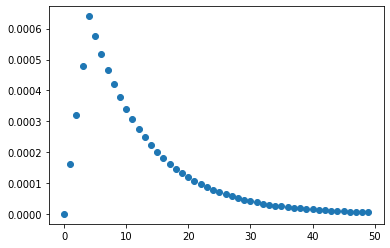

In [15]:
def get_lr_callback(plot=False):
    lr_start = 0.000001
    lr_max   = 0.000005 * config.BATCH_SIZE
    lr_min   = 0.000001
    lr_ramp_ep = 4
    lr_sus_ep  = 0
    lr_decay = 0.9

    def lrfn(epoch):
        if config.RESUME:
            epoch = epoch + config.RESUME_EPOCH
        if epoch < lr_ramp_ep:
            lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start
        elif epoch < lr_ramp_ep + lr_sus_ep:
            lr = lr_max
        else:
            lr = (lr_max - lr_min) * lr_decay**(epoch - lr_ramp_ep - lr_sus_ep) + lr_min
        return lr

    if plot:
        epochs = list(range(config.EPOCHS))
        learning_rates = [lrfn(x) for x in epochs]
        plt.scatter(epochs, learning_rates)
        plt.show()

    lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=False)
    return lr_callback

get_lr_callback(plot=True)

In [16]:
class Snapshot(tf.keras.callbacks.Callback):
    def __init__(self, fold, snapshot_epochs=[]):
        super(Snapshot, self).__init__()
        self.snapshot_epochs = snapshot_epochs
        self.fold = fold

    def on_epoch_end(self, epoch, logs=None):
        if epoch in self.snapshot_epochs:
            self.model.save_weights(config.save_dir+f'/EF{config.MODEL_NAME}_epoch{epoch}.h5')
        self.model.save_weights(config.save_dir+f'/{config.MODEL_NAME}_last.h5')

## Train

In [17]:
TRAINING_FILENAMES = [x for i,x in enumerate(train_files) if i%config.FOLDS!=config.FOLD_TO_RUN]
VALIDATION_FILENAMES = [x for i,x in enumerate(train_files) if i%config.FOLDS==config.FOLD_TO_RUN]
print(len(TRAINING_FILENAMES), len(VALIDATION_FILENAMES),
      count_data_items(TRAINING_FILENAMES), count_data_items(VALIDATION_FILENAMES))

8 2 40826 10207


In [18]:
if config.DEBUG:
    TRAINING_FILENAMES = [TRAINING_FILENAMES[0]]
    VALIDATION_FILENAMES = [VALIDATION_FILENAMES[0]]
    print(len(TRAINING_FILENAMES), len(VALIDATION_FILENAMES), 
          count_data_items(TRAINING_FILENAME), count_data_items(VALIDATION_FILENAMES))
    test_files = [test_files[0]]

In [19]:
seed_everything(config.SEED)
VERBOSE = 1
train_dataset = get_training_dataset(TRAINING_FILENAMES)
val_dataset = get_val_dataset(VALIDATION_FILENAMES)
STEPS_PER_EPOCH = count_data_items(TRAINING_FILENAMES) // config.BATCH_SIZE
train_logger = tf.keras.callbacks.CSVLogger(config.save_dir+'/training-log-fold-%i.h5.csv'%config.FOLD_TO_RUN)
# Save best model each fold
sv_loss = tf.keras.callbacks.ModelCheckpoint(
    config.save_dir+f"/{config.MODEL_NAME}_loss_{config.FOLD_TO_RUN}.h5",
    monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=True, mode='min', save_freq='epoch'
)
# Build model
K.clear_session()
model,embed_model = get_model()
snap = Snapshot(fold=config.FOLD_TO_RUN, snapshot_epochs=[5,8])
#model.summary()

if config.RESUME:
    model.load_weights(config.resume_model_wts)

258080768/258068648 [==============================] - 6s 0us/step


In [20]:
import gc
gc.collect()

1705

In [21]:
print('#### Image Size %i with EfficientNet B%i and batch_size %i'%
      (config.IMAGE_SIZE, config.EFF_NET, config.BATCH_SIZE))
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    steps_per_epoch=STEPS_PER_EPOCH,
                    epochs=config.EPOCHS,
                    callbacks=[snap, get_lr_callback(), train_logger, sv_loss],
                    verbose=VERBOSE)

#### Image Size 512 with EfficientNet B7 and batch_size 128
Epoch 1/50


UnavailableError: ignored

In [ ]:
#with open(config.save_dir+f'trainn_{filename.split("/")[-1]}_{config.FOLD_TO_RUN}.npy', 'rb') as f:

In [ ]:
#model.load_weights(config.save_dir+f'/{config.MODEL_NAME}_loss.h5')
#embed_models = []
#for i in range(5):
#    model,embed_model = get_model()
#    embed_models.append((model.load_weights(f'../input/happywhale-arcface-eff5-768/effnetv1_b5_loss_{i}.h5'), embed_model))

## Evaluation

In [24]:
def better_than_median(inputs, axis):
    """Compute the mean of the predictions if there are no outliers,
    or the median if there are outliers.

    Parameter: inputs = ndarray of shape (n_samples, n_folds)"""
    spread = inputs.max(axis=axis) - inputs.min(axis=axis)
    spread_lim = 0.45
    print(f'Inliers:  {(spread < spread_lim).sum():7} -> compute mean')
    print(f'Outliers: {(spread >= spread_lim).sum():7} -> compute median')
    print(f'Total:    {len(inputs):7}')
    return np.where(spread < spread_lim,
                    np.mean(inputs, axis=axis),
                    np.median(inputs, axis=axis))

In [35]:
def get_ids(filename):
    ds = get_test_dataset([filename], get_names=True).map(lambda image, image_name: image_name).unbatch()
    NUM_IMAGES = count_data_items([filename])
    ids = next(iter(ds.batch(NUM_IMAGES))).numpy().astype('U')
    return ids

def get_targets(filename):
    ds = get_eval_dataset([filename], get_targets=True).map(lambda image, target: target).unbatch()
    NUM_IMAGES = count_data_items([filename])
    ids = next(iter(ds.batch(NUM_IMAGES))).numpy() 
    return ids

def get_embeddings(filename):
    ds = get_test_dataset([filename], get_names=False)
    embeddings = np.mean(np.stack([embed_models[x][1].predict(ds, verbose=0) for x in range(5)]), axis=0)
    #print(embeddings.shape)
    return embeddings

def get_embeddings_np(filename, data_types='train', kfold_list=([x for x in range(5)]), dataset='../input/eff7-new-768'):
    #ds = get_test_dataset([filename], get_names=False)
    #embeddings = np.mean(np.stack([embed_models[x][1].predict(ds, verbose=0) for x in range(5)]), axis=0)
    #print(embeddings.shape)
    val_train = {'train':'val', 'val':'train', 'test':'test'}
    embeddings = []
    for kfold in kfold_list:
        path = f'{dataset}/{data_types}_{filename.split("/")[-1]}_{kfold}.npy'
        if os.path.exists(path):
            print(path)
            with open(path, 'rb') as f:
                embeddings.append(np.load(f))
        else:
            path = f'{dataset}/{val_train[data_types]}_{filename.split("/")[-1]}_{kfold}.npy'
            if os.path.exists(path):
                print(path)
                with open(path, 'rb') as f:
                    embeddings.append(np.load(f))
        
        print(len(embeddings))
        embeddings = np.mean(np.stack(embeddings), axis=0)
        #embeddings = np.median(np.stack(embeddings), axis=0)
        #embeddings = better_than_median(np.stack(embeddings), axis=0)

        return embeddings

def get_predictions(test_df, threshold=0.2):
    predictions = {}
    for i,row in tqdm(test_df.iterrows()):
        if row.image in predictions:
            if len(predictions[row.image])==5:
                continue
            predictions[row.image].append(row.target)
        elif row.confidence > threshold:
            predictions[row.image] = [row.target, 'new_individual']
        else:
            predictions[row.image] = ['new_individual', row.target]

    for x in tqdm(predictions):
        if len(predictions[x]) < 5:
            remaining = [y for y in sample_list if y not in predictions]
            predictions[x] = predictions[x] + remaining
            predictions[x] = predictions[x][:5]

    return predictions

def map_per_image(label, predictions):
    """Computes the precision score of one image.

    Parameters
    ----------
    label : string
            The true label of the image
    predictions : list
            A list of predicted elements (order does matter, 5 predictions allowed per image)

    Returns
    -------
    score : double
    """    
    try:
        return 1 / (predictions[:5].index(label) + 1)
    except ValueError:
        return 0.0

#f = open('../input/happywhale-splits/individual_ids.json', 'r')
f = open('/content/drive/MyDrive/Colab Notebooks/Tensorflow Practice 2022/Kaggle/Happywhale/individual_ids.json', 'r')
target_encodings = json.loads(f.read())
target_encodings = {target_encodings[x]:x for x in target_encodings}
sample_list = ['938b7e931166', '5bf17305f073', '7593d2aee842', '7362d7a01d00','956562ff2888']

In [38]:
train_targets = []
train_embeddings = []
for filename in tqdm(TRAINING_FILENAMES):
    embeddings = get_embeddings_np(filename)
    targets = get_targets(filename)
    train_embeddings.append(embeddings)
    train_targets.append(targets)
train_embeddings = np.concatenate(train_embeddings)
train_targets = np.concatenate(train_targets)

  0%|          | 0/8 [00:00<?, ?it/s]

0


ValueError: ignored

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neightbors=config.KNN, metric='cosine')
neigh.fit(train_embeddings)

In [ ]:
test_ids = []
test_nn_distances = []
test_nn_idxs = []
val_targets = []
val_embeddings = []
for filename in tqdm(VALIDATION_FILENAMES):
    embeddings = get_embeddings_np(filename, 'val')
    targets = get_targets(filename)
    ids = get_ids(filename)
    distances, idxs = neight.kneightbors(embeddings, config.KNN, return_distance=True)
    test_ids.append(ids)
    test_nn_idxs.append(idxs)
    test_nn_distances.append(distances)
    val_embediings.append(embeddings)
    val_targets.append(targets)
test_nn_distances = np.concatenate(test_nn_distances)
test_nn_idxs = np.concatenate(test_ids)
val_embeddings = np.concatenate(val_embeddings)
val_targets = np.concatentate(val_targets)

In [ ]:
allowed_targets = set([target_encodings[x] for x in np.unique(train_targets)])
val_targets_df = pd.DataFrame(np.stack([test_ids,val_targets],axis=1),columns=['image','target'])
val_targets_df['target'] = val_targets_df['target'].astype(int).map(target_encodings)
val_targets_df.loc[~val_targets_df.target.isin(allowed_targets),'target'] = 'new_individual'
val_targets_df.target.value_counts()

In [ ]:
test_df = []
for i in tqdm(range(len(test_ids))):
    id_ = test_ids[i]
    targets = train_targets[test_nn_idxs[i]]
    distances = test_nn_distances[i]
    subset_preds = pd.DataFrame(np.stack([targets,distances],axis=1),columns=['target','distances'])
    subset_preds['image'] = id_
    test_df.append(subset_preds)
test_df = pd.concat(test_df).reset_index(drop=True)
test_df['confidence'] = 1-test_df['distances']
test_df = test_df.groupby(['image','target']).confidence.max().reset_index()
test_df = test_df.sort_values('confidence',ascending=False).reset_index(drop=True)
test_df['target'] = test_df['target'].map(target_encodings)
test_df.to_csv('val_neighbors.csv')
test_df.image.value_counts().value_counts()

In [ ]:
## Compute CV
best_th = 0
best_cv = 0
for th in [0.1*x for x in range(11)]:
    all_preds = get_predictions(test_df,threshold=th)
    cv = 0
    for i,row in val_targets_df.iterrows():
        target = row.target
        preds = all_preds[row.image]
        val_targets_df.loc[i,th] = map_per_image(target,preds)
    cv = val_targets_df[th].mean()
    print(f"CV at threshold {th}: {cv}")
    if cv>best_cv:
        best_th = th
        best_cv = cv

In [ ]:
print("Best threshold",best_th)
print("Best cv",best_cv)
val_targets_df.describe()

In [ ]:
## Adjustment: Since Public lb has nearly 10% 'new_individual' (Be Careful for private LB)
val_targets_df['is_new_individual'] = val_targets_df.target=='new_individual'
print(val_targets_df.is_new_individual.value_counts().to_dict())
val_scores = val_targets_df.groupby('is_new_individual').mean().T
val_scores['adjusted_cv'] = val_scores[True]*0.1+val_scores[False]*0.9
best_threshold_adjusted = val_scores['adjusted_cv'].idxmax()
print("best_threshold",best_threshold_adjusted)
val_scores

## Inference

In [ ]:
train_embeddings = np.concatenate([train_embeddings,val_embeddings])
train_targets = np.concatenate([train_targets,val_targets])
print(train_embeddings.shape,train_targets.shape)

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=config.KNN,metric='cosine')
neigh.fit(train_embeddings)

In [ ]:
test_ids = []
test_nn_distances = []
test_nn_idxs = []
for filename in tqdm(test_files):
    embeddings = get_embeddings_np(filename,'test')
    ids = get_ids(filename)
    distances,idxs = neigh.kneighbors(embeddings, config.KNN, return_distance=True)
    test_ids.append(ids)
    test_nn_idxs.append(idxs)
    test_nn_distances.append(distances)
test_nn_distances = np.concatenate(test_nn_distances)
test_nn_idxs = np.concatenate(test_nn_idxs)
test_ids = np.concatenate(test_ids)

In [ ]:
sample_submission = pd.read_csv('../input/happy-whale-and-dolphin/sample_submission.csv',index_col='image')
print(len(test_ids),len(sample_submission))
test_df = []
for i in tqdm(range(len(test_ids))):
    id_ = test_ids[i]
    targets = train_targets[test_nn_idxs[i]]
    distances = test_nn_distances[i]
    subset_preds = pd.DataFrame(np.stack([targets,distances],axis=1),columns=['target','distances'])
    subset_preds['image'] = id_
    test_df.append(subset_preds)
test_df = pd.concat(test_df).reset_index(drop=True)
test_df['confidence'] = 1-test_df['distances']
test_df = test_df.groupby(['image','target']).confidence.max().reset_index()
test_df = test_df.sort_values('confidence',ascending=False).reset_index(drop=True)
test_df['target'] = test_df['target'].map(target_encodings)
test_df.to_csv('test_neighbors.csv')
test_df.image.value_counts().value_counts()

In [ ]:
sample_list = ['938b7e931166', '5bf17305f073', '7593d2aee842', '7362d7a01d00','956562ff2888']

In [ ]:
predictions = {}
for i,row in tqdm(test_df.iterrows()):
    if row.image in predictions:
        if len(predictions[row.image])==5:
            continue
        predictions[row.image].append(row.target)
    elif row.confidence>best_threshold_adjusted:#best_threshold_adjusted
        predictions[row.image] = [row.target,'new_individual']
    else:
        predictions[row.image] = ['new_individual',row.target]
        
for x in tqdm(predictions):
    if len(predictions[x])<5:
        remaining = [y for y in sample_list if y not in predictions]
        predictions[x] = predictions[x]+remaining
        predictions[x] = predictions[x][:5]
    predictions[x] = ' '.join(predictions[x])
    
predictions = pd.Series(predictions).reset_index()
predictions.columns = ['image','predictions']
predictions.to_csv('submission.csv',index=False)
predictions.head()

In [ ]:
print (test_df)